In [1]:
import os
import pandas as pd
import duckdb

In [2]:
DIRPATH = 'datasets/new_data/'
EXTRACT_CSV = 'datasets/new_data/csv/'

In [3]:
list_votacao_csv_files = [ f for f in os.listdir(os.path.join(DIRPATH, 'csv')) if f.endswith('.csv') ]

In [4]:
df_rj = pd.concat(
    (
    pd.read_csv(
        os.path.join(DIRPATH, 'csv', f), 
        encoding='iso-8859-1', 
        delimiter=';'
        ).dropna(axis=0, how='all') for f in list_votacao_csv_files
    ), 
    axis=0)

/tmp/ipykernel_41532/1481000387.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_rj = pd.concat(


In [18]:
# proto1 = [ (*t,) for t in enumerate(df_rj.columns.tolist()) ]
# proto1

In [17]:
col_types_munzona = [
    (0, 'DT_GERACAO', str),
    (1, 'HH_GERACAO', str),
    (2, 'ANO_ELEICAO', str),
    (3, 'CD_TIPO_ELEICAO', str),
    (4, 'NM_TIPO_ELEICAO', str),
    (5, 'NR_TURNO', str),
    (6, 'CD_ELEICAO', str),
    (7, 'DS_ELEICAO', str),
    (8, 'DT_ELEICAO', str),
    (9, 'TP_ABRANGENCIA', str),
    (10, 'SG_UF', str),
    (11, 'SG_UE', str),
    (12, 'NM_UE', str),
    (13, 'CD_MUNICIPIO', str),
    (14, 'NM_MUNICIPIO', str),
    (15, 'NR_ZONA', str),
    (16, 'CD_CARGO', str),
    (17, 'DS_CARGO', str),
    (18, 'SQ_CANDIDATO', str),
    (19, 'NR_CANDIDATO', str),
    (20, 'NM_CANDIDATO', str),
    (21, 'NM_URNA_CANDIDATO', str),
    (22, 'NM_SOCIAL_CANDIDATO', str),
    (23, 'CD_SITUACAO_CANDIDATURA', str),
    (24, 'DS_SITUACAO_CANDIDATURA', str),
    (25, 'CD_DETALHE_SITUACAO_CAND', str),
    (26, 'DS_DETALHE_SITUACAO_CAND', str),
    (27, 'TP_AGREMIACAO', str),
    (28, 'NR_PARTIDO', str),
    (29, 'SG_PARTIDO', str),
    (30, 'NM_PARTIDO', str),
    (31, 'SQ_COLIGACAO', str),
    (32, 'NM_COLIGACAO', str),
    (33, 'DS_COMPOSICAO_COLIGACAO', str),
    (34, 'CD_SIT_TOT_TURNO', str),
    (35, 'DS_SIT_TOT_TURNO', str),
    (36, 'ST_VOTO_EM_TRANSITO', str),
    (37, 'QT_VOTOS_NOMINAIS', str),
    (38, 'TP_ABRANGENCIA_ELEICAO', str),
    (39, 'NR_FEDERACAO', str),
    (40, 'NM_FEDERACAO', str),
    (41, 'SG_FEDERACAO', str),
    (42, 'DS_COMPOSICAO_FEDERACAO', str),
    (43, 'NM_TIPO_DESTINACAO_VOTOS', str),
    (44, 'QT_VOTOS_NOMINAIS_VALIDOS', str)
]

In [20]:
df_rj.iloc[:,10:28].head()

,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO
0,RJ,58017,ANGRA DOS REIS,58017,ANGRA DOS REIS,116,11,Prefeito,31,15,FERNANDO ANTONIO CECILIANO JORDÃO,FERNANDO JORDÃO,#NE,2,APTO,2,DEFERIDO,Coligação
1,RJ,58017,ANGRA DOS REIS,58017,ANGRA DOS REIS,116,11,Prefeito,63,13,MARIA DO CARMO AGUIAR,L I A,#NE,2,APTO,2,DEFERIDO,Coligação
2,RJ,58017,ANGRA DOS REIS,58017,ANGRA DOS REIS,116,11,Prefeito,65,12,MARIO DESCHAMPS,MARIO DESCHAMPS,#NE,2,APTO,2,DEFERIDO,Coligação
3,RJ,58017,ANGRA DOS REIS,58017,ANGRA DOS REIS,116,13,Vereador,106,65123,AGUILAR RIBEIRO DA SILVA,AGUILAR DOS METALÚRGICOS,#NE,2,APTO,2,DEFERIDO,Coligação
4,RJ,58017,ANGRA DOS REIS,58017,ANGRA DOS REIS,116,13,Vereador,168,15555,ALBERTO MAGNO TEIXEIRA DA FONSECA,ALBERTO (BETO) MÁGNO,#NE,2,APTO,2,DEFERIDO,Partido isolado


<Axes: xlabel='NM_MUNICIPIO'>

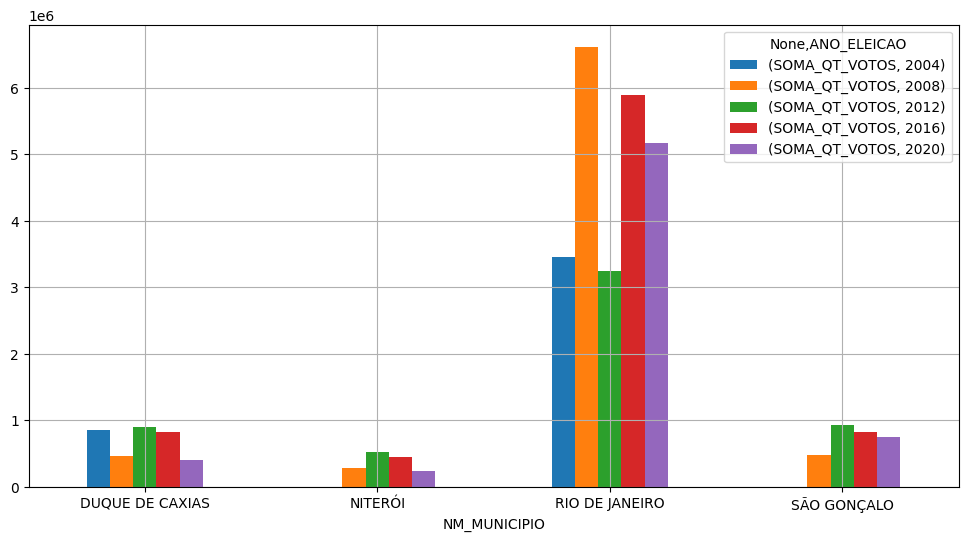

In [73]:
query_voto_munzona = """ 
SELECT 
ANO_ELEICAO,
NM_MUNICIPIO,
SUM(QT_VOTOS_NOMINAIS) AS SOMA_QT_VOTOS
FROM df_rj
WHERE 1=1
    AND CD_CARGO = 11
    AND NM_MUNICIPIO IN ('RIO DE JANEIRO', 'SÃO GONÇALO', 'NITERÓI', 'DUQUE DE CAXIAS')
GROUP BY 1,2
ORDER BY 1 DESC, SOMA_QT_VOTOS DESC
"""
duckdb.query(query_voto_munzona).to_df()\
    .pivot_table(index='NM_MUNICIPIO', columns='ANO_ELEICAO')\
    .plot(kind='bar', figsize=(12,6), rot=0, grid=True)